# 1. Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2, SelectKBest
from shapely.geometry import Point
from shapely.geometry import Polygon
import geopandas

# 2. Reading the South Shipping data and exploring it

In [2]:

file_path = r"D:\Yugandar\Hanni\Southern_Second_Order.csv"
# file_path = '/Users/Hanni/Dropbox/100 Masterabeit-Ausarbeitung/3. Data/Southern_Second_Order.csv'
column_names = ['mssi','shiptype','length','breadth','draught','longtitude', 'latitude','sog','cog','th','destination','name','callsign','utc']

south_data = pd.read_csv(file_path, names = column_names, sep=';', decimal=',', header=0, parse_dates=[11])
# Adding the tss column with value 1 to the south_data data frame
south_data["tss"] = 1

print("The number of data points in the data  :", south_data.shape[0])
print("The features of the data :", south_data.shape[1])
south_data.head(5)

The number of data points in the data  : 2581911
The features of the data : 15


mssi  shiptype  length  breadth  draught  longtitude  latitude   sog  \
0  209792000        71     151       23      8.3   -9.000997  38.42426  10.0   
1  209792000        71     151       23      8.3   -9.003961  38.42154  11.4   
2  209792000        71     151       23      8.3   -9.007154  38.41946  12.2   
3  209792000        71     151       23      8.3   -9.011689  38.41722  13.1   
4  209792000        71     151       23      8.3   -9.016516  38.41532  14.2   

     cog   th destination          name callsign                      utc  tss  
0  218.5  222   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:08:00.187    1  
1  222.4  230   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:09:08.657    1  
2  232.8  239   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:10:08.903    1  
3  240.3  243   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:11:18.507    1  
4  244.7  248   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:12:47.010    1

In [16]:
south_data.isnull().sum()

mssi                0
shiptype            0
length              0
breadth             0
draught             0
longtitude          0
latitude            0
sog                 0
cog                 0
th                  0
destination    132301
name                0
callsign       131069
utc                 1
tss                 0
dtype: int64

In [10]:
# Getting the number of unique values in each column/feature
for column in south_data.columns:
    print(column + ": " + str(len(south_data[column].unique())))

mssi: 1296
shiptype: 53
length: 241
breadth: 64
draught: 147
longtitude: 8003151
latitude: 1586492
sog: 336
cog: 3603
th: 373
destination: 4515
name: 1389
callsign: 1452
utc: 12176166
tss: 1


# 3. Reading the North Shipping data and exploring it

In [3]:

# file_path = '/Users/Hanni/Dropbox/100 Masterabeit-Ausarbeitung/3. Data/northern_tss_v2.csv'
file_path = r"D:\Yugandar\Hanni\northern_tss_v2.csv"
column_names = ['mssi','shiptype','length','breadth','draught','longtitude', 'latitude','sog','cog','th','destination','name','callsign','utc']

north_data = pd.read_csv(file_path, names = column_names, sep=';', decimal=',', header=0, parse_dates=[11])
# Adding a tss column with value 0 to the north_data data frame.
north_data["tss"] = 0

print("The number of data points in the data  :", north_data.shape[0])
print("The features of the data :", north_data.shape[1])

north_data.head(5)

The number of data points in the data  : 3776616
The features of the data : 15


mssi  shiptype  length  breadth  draught  longtitude  latitude   sog  \
0  205461000         0       0        0      0.0    5.475775  53.94318  16.3   
1  205461000         0       0        0      0.0    5.484838  53.94794  16.2   
2  205461000         0       0        0      0.0    5.490520  53.95095  16.3   
3  205461000         0       0        0      0.0    5.495560  53.95363  16.4   
4  205461000         0       0        0      0.0    5.501295  53.95661  16.2   

    cog  th destination name callsign                      utc  tss  
0  48.0  45         NaN  nan      NaN  2018-02-01 22:59:53.727    0  
1  47.0  45         NaN  nan      NaN  2018-02-01 23:01:29.847    0  
2  48.0  46         NaN  nan      NaN  2018-02-01 23:02:30.007    0  
3  47.4  46         NaN  nan      NaN  2018-02-01 23:03:23.243    0  
4  47.0  45         NaN  nan      NaN  2018-02-01 23:04:23.397    0

In [4]:
# Getting the number of unique values in each column/feature
for column in north_data.columns:
    print(column + ": " + str(len(north_data[column].unique())))

mssi: 315
shiptype: 31
length: 122
breadth: 46
draught: 135
longtitude: 2962244
latitude: 965699
sog: 277
cog: 3602
th: 367
destination: 1707
name: 359
callsign: 350
utc: 3635938
tss: 1


# 4.Cleaning NaN Data points for North_Data

## 4.1 Making NaN Data in data colums

In [5]:
# In Length Column => Marking 0 as NaN
# In breadth Column => Marking 0 as NaN
# In draught Column => Marking 0 as NaN
# In name Column => Marking nan as NaN

north_data["length"] = north_data["length"].replace({ 0:np.nan})
north_data["breadth"] = north_data["breadth"].replace({ 0:np.nan})
north_data["draught"] = north_data["draught"].replace({ 0:np.nan})
north_data["name"] = north_data["name"].replace({'nan':np.nan, 0:np.nan})

# 4.2 Dropping NaN Data

In [6]:
# Dropping the NaN values from the merged_df data frame and storing the same in cleaned_df data frame
cleaned_ndf = north_data.dropna()
print("The number of data points in the data  :", cleaned_ndf.shape[0])
print("The features of the data :", cleaned_ndf.shape[1])
cleaned_ndf.head(5)

The number of data points in the data  : 3577772
The features of the data : 15


mssi  shiptype  length  breadth  draught  longtitude  latitude   sog  \
7   205461000         0   162.0     25.0      6.3    5.517354  53.96507  16.3   
8   205461000         0   162.0     25.0      6.3    5.523613  53.96833  16.2   
9   205461000         0   162.0     25.0      6.3    5.529877  53.97159  16.2   
10  205461000         0   162.0     25.0      6.3    5.535505  53.97463  16.1   
11  205461000         0   162.0     25.0      6.3    5.541227  53.97757  16.2   

     cog  th    destination       name callsign                      utc  tss  
7   48.0  46  SE GOTHENBURG  VALENTINE     ONJB  2018-02-01 23:07:18.230    0  
8   49.0  46  SE GOTHENBURG  VALENTINE     ONJB  2018-02-01 23:08:24.303    0  
9   48.0  45  SE GOTHENBURG  VALENTINE     ONJB  2018-02-01 23:09:30.100    0  
10  48.0  46  SE GOTHENBURG  VALENTINE     ONJB  2018-02-01 23:10:30.183    0  
11  49.0  45  SE GOTHENBURG  VALENTINE     ONJB  2018-02-01 23:11:30.210    0

In [14]:
# Printing the no. of unique values in each column/feature
for column in cleaned_ndf.columns:
    print(column + ": " + str(len(cleaned_ndf[column].unique())))

mssi: 313
shiptype: 30
length: 118
breadth: 43
draught: 134
longtitude: 2808128
latitude: 904127
sog: 272
cog: 3602
th: 365
destination: 1702
name: 353
callsign: 347
utc: 3444721
tss: 1


# 4. Concatenating the South and North Data

In [7]:
#Concatenating the south_data and north_data data frames into merged_df data frame
merged_df = pd.concat([south_data,cleaned_ndf])
merged_df.head(5)

mssi  shiptype  length  breadth  draught  longtitude  latitude   sog  \
0  209792000        71   151.0     23.0      8.3   -9.000997  38.42426  10.0   
1  209792000        71   151.0     23.0      8.3   -9.003961  38.42154  11.4   
2  209792000        71   151.0     23.0      8.3   -9.007154  38.41946  12.2   
3  209792000        71   151.0     23.0      8.3   -9.011689  38.41722  13.1   
4  209792000        71   151.0     23.0      8.3   -9.016516  38.41532  14.2   

     cog   th destination          name callsign                      utc  tss  
0  218.5  222   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:08:00.187    1  
1  222.4  230   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:09:08.657    1  
2  232.8  239   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:10:08.903    1  
3  240.3  243   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:11:18.507    1  
4  244.7  248   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:12:47.010    1

In [8]:
#Printing the non null values of merged_df data frame
merged_df[merged_df.notnull()]

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
0        209792000        71   151.0     23.0      8.3   -9.000997  38.42426   
1        209792000        71   151.0     23.0      8.3   -9.003961  38.42154   
2        209792000        71   151.0     23.0      8.3   -9.007154  38.41946   
3        209792000        71   151.0     23.0      8.3   -9.011689  38.41722   
4        209792000        71   151.0     23.0      8.3   -9.016516  38.41532   
5        209792000        71   151.0     23.0      8.3   -9.024416  38.41254   
6        209792000        71   151.0     23.0      8.3   -9.029632  38.41069   
7        209792000        71   151.0     23.0      8.3   -9.034947  38.40883   
8        209792000        71   151.0     23.0      8.3   -9.040313  38.40694   
9        209792000        71   151.0     23.0      8.3   -9.045724  38.40509   
10       209792000        71   151.0     23.0      8.3   -9.051181  38.40327   
11       209792000        71   151.0     23.0      8.3   -9.057116  38.40127   
12       209792000        71   151.0     23.0      8.3   -9.062711  38.39940   
13       209792000        71   151.0     23.0      8.3   -9.068241  38.39756   
14       209792000        71   151.0     23.0      8.3   -9.073784  38.39571   
15       209792000        71   151.0     23.0      8.3   -9.079431  38.39385   
16       209792000        71   151.0     23.0      8.3   -9.085376  38.39191   
17       209792000        71   151.0     23.0      8.3   -9.090942  38.39011   
18       209792000        71   151.0     23.0      8.3   -9.096609  38.38831   
19       209792000        71   151.0     23.0      8.3   -9.102180  38.38653   
20       209792000        71   151.0     23.0      8.3   -9.107766  38.38476   
21       209792000        71   151.0     23.0      8.3   -9.113344  38.38299   
22       209792000        71   151.0     23.0      8.3   -9.118913  38.38122   
23       209792000        71   151.0     23.0      8.3   -9.124464  38.37946   
24       209792000        71   151.0     23.0      8.3   -9.129926  38.37774   
25       209792000        71   151.0     23.0      8.3   -9.135570  38.37596   
26       209792000        71   151.0     23.0      8.3   -9.141007  38.37423   
27       209792000        71   151.0     23.0      8.3   -9.147164  38.37228   
28       209792000        71   151.0     23.0      8.3   -9.152666  38.37052   
29       209792000        71   151.0     23.0      8.3   -9.158151  38.36874   
...            ...       ...     ...      ...      ...         ...       ...   
3776586  563036000        89   144.0     22.0      9.0   11.706740  57.64794   
3776587  563036000        89   144.0     22.0      9.0   11.703560  57.64581   
3776588  563036000        89   144.0     22.0      9.0   11.700430  57.64362   
3776589  563036000        89   144.0     22.0      9.0   11.697320  57.64142   
3776590  563036000        89   144.0     22.0      9.0   11.694240  57.63915   
3776591  563036000        89   144.0     22.0      9.0   11.691110  57.63689   
3776592  563036000        89   144.0     22.0      9.0   11.687990  57.63457   
3776593  563036000        89   144.0     22.0      9.0   11.684900  57.63227   
3776594  563036000        89   144.0     22.0      9.0   11.681380  57.62965   
3776595  563036000        89   144.0     22.0      9.0   11.678320  57.62732   
3776596  563036000        89   144.0     22.0      9.0   11.675230  57.62502   
3776597  563036000        89   144.0     22.0      9.0   11.672120  57.62268   
3776598  563036000        89   144.0     22.0      9.0   11.669060  57.62035   
3776599  563036000        89   144.0     22.0      9.0   11.665740  57.61818   
3776600  563036000        89   144.0     22.0      9.0   11.662120  57.61611   
3776601  563036000        89   144.0     22.0      9.0   11.658420  57.61409   
3776602  563036000        89   144.0     22.0      9.0   11.654650  57.61215   
3776603  563036000        89   144.0     22.0      9.0   11.650810  57.61019   
3776604  56303

# 6. Filtering the ship data based on the cordinates

## 6.1 Hamburg Polygon

In [9]:
hamburg = Polygon(((10.23, 53.62),(10.21,53.75),(9.93,53.67),(9.72,53.63),(9.72,53.5),(10,53.4),(10.26,53.47),(10.23,53.62)))
hamburg_points = Polygon(((53.62,10.23),(53.75,10.21),(53.67, 9.93),(53.63,9.72,),(53.5,9.72),(53.4,10),(53.47,10.26),(53.62,10.23)))

## 6.2 Making the coordinate points from latitude and longtitude

In [10]:
# Making the coordinate points from the latitude and longitude
merged_df["Points"] = [Point((lat, long)) for lat, long in zip(merged_df.latitude, merged_df.longtitude)]
# Making a columns whose cordinates match with the Hamburgs
merged_df["Dest_Hamburg"] = [hamburg_points.contains(x) for x in merged_df["Points"]]
merged_df.head(5)

mssi  shiptype  length  breadth  draught  longtitude  latitude   sog  \
0  209792000        71   151.0     23.0      8.3   -9.000997  38.42426  10.0   
1  209792000        71   151.0     23.0      8.3   -9.003961  38.42154  11.4   
2  209792000        71   151.0     23.0      8.3   -9.007154  38.41946  12.2   
3  209792000        71   151.0     23.0      8.3   -9.011689  38.41722  13.1   
4  209792000        71   151.0     23.0      8.3   -9.016516  38.41532  14.2   

     cog   th destination          name callsign                      utc  \
0  218.5  222   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:08:00.187   
1  222.4  230   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:09:08.657   
2  232.8  239   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:10:08.903   
3  240.3  243   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:11:18.507   
4  244.7  248   ROTTERDAM  STEFAN SIBUM    5BQX3  2018-01-31 23:12:47.010   

   tss                               Points  Dest_Hamburg  
0    1           POINT (38.42426 -9.000997)         False  
1    1           POINT (38.42154 -9.003961)         False  
2    1           POINT (38.41946 -9.007154)         False  
3    1  POINT (38.41722 -9.011689000000001)         False  
4    1  POINT (38.41532 -9.016516000000001)         False

## 6.3 Displaying the data with destination Hamburg

In [11]:
Hamburg_df = merged_df[merged_df["Dest_Hamburg"] == True]
print("The number of data points in the north data frame is : ", Hamburg_df.shape[0])
print("The features of the data :", Hamburg_df.shape[1])
Hamburg_df.head(5)

The number of data points in the north data frame is :  46032
The features of the data : 17


mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5    9.938713  53.50006   
31447  218366000        70   335.0     42.0     12.5    9.939112  53.50013   
31448  218366000        70   335.0     42.0     12.5    9.939456  53.50024   
31449  218366000        70   335.0     42.0     12.5    9.939678  53.50057   
31450  218366000        70   335.0     42.0     12.5    9.939685  53.50110   

       sog    cog   th    destination           name callsign  \
31446  0.7   78.8    0  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31447  0.8   76.3    0  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31448  1.0   46.5  359  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31449  1.6   17.8  356  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31450  2.1  358.5  354  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   

                           utc  tss                              Points  \
31446  2018-02-01 05:17:15.797    1           POINT (53.50006 9.938713)   
31447  2018-02-01 05:18:15.750    1  POINT (53.50013000000001 9.939112)   
31448  2018-02-01 05:19:15.730    1  POINT (53.50024000000001 9.939456)   
31449  2018-02-01 05:20:15.737    1  POINT (53.50057 9.939678000000001)   
31450  2018-02-01 05:21:15.797    1   POINT (53.5011 9.939685000000001)   

       Dest_Hamburg  
31446          True  
31447          True  
31448          True  
31449          True  
31450          True

In [44]:
# We cannot get the unique values from Points columns since the data type of the Points is not string or int.
# So, getting the unique values for the rest of the columns.

for column in Hamburg_df.columns:
    if column != "Points":
        print(column + ":" + str(len(Hamburg_df[column].unique())))

mssi:217
shiptype:16
length:99
breadth:38
draught:110
longtitude:37277
latitude:7164
sog:152
cog:3286
th:361
destination:189
name:218
callsign:217
utc:43110
tss:2
Dest_Hamburg:1


## 6.4 Printing all shiptypes

In [45]:
print("The number of ship types is : ",len(Hamburg_df["shiptype"].unique()))
print("The ship types are :", Hamburg_df["shiptype"].unique().tolist())

The number of ship types is :  16
The ship types are : [70, 71, 79, 82, 80, 72, 89, 20, 0, 74, 73, 9, 60, 83, 84, 190]


# 7.Getting the unique values of Ship types

## 7.1 Printing and plotting the number of ships of each ship type

In [46]:
# Printing the number of ships of each ship type.
ship_val_cnts = dict(Hamburg_df["shiptype"].value_counts().sort_values(ascending=False))
print("\tSHIP TYPE \t No. OF SHIPS")
for k,v in ship_val_cnts.items():
    print(" \t   {0} \t\t {1}".format(k,v))

	SHIP TYPE 	 No. OF SHIPS
 	   71 		 12176
 	   70 		 10673
 	   80 		 8221
 	   79 		 5242
 	   89 		 3735
 	   82 		 1912
 	   74 		 1719
 	   72 		 703
 	   0 		 278
 	   9 		 258
 	   84 		 250
 	   60 		 232
 	   73 		 205
 	   83 		 202
 	   190 		 159
 	   20 		 67


Text(0.5,1,'Bar Plot of Ship Types with its count')

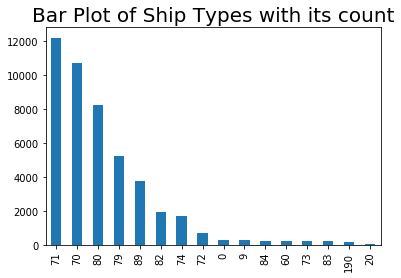

In [48]:
# Plotting a bar plot of each ship type and the no. of ships for each ship type.
Hamburg_df["shiptype"].value_counts().plot(kind = "bar")
plt.title("Bar Plot of Ship Types with its count", fontsize = 20)

## 7.2 Creating a dictionary of Data Frames based on Ship type

In [49]:
shiptypes_dict = dict(tuple(Hamburg_df.groupby("shiptype")))
print("The length of the dictionary is : ", len(shiptypes_dict))

The length of the dictionary is :  16


In [50]:
# Printing the data related to ship type (for example) 71 from the shiptypes_dict
shiptypes_dict[71]

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
54751    235109665        71   398.0     54.0     12.9    9.723843  53.56349   
54752    235109665        71   398.0     54.0     12.9    9.729075  53.56309   
54753    235109665        71   398.0     54.0     12.9    9.734274  53.56270   
54754    235109665        71   398.0     54.0     12.9    9.739457  53.56232   
54755    235109665        71   398.0     54.0     12.9    9.744457  53.56195   
54756    235109665        71   398.0     54.0     12.9    9.749340  53.56158   
54757    235109665        71   398.0     54.0     12.9    9.753923  53.56125   
54758    235109665        71   398.0     54.0     12.9    9.758442  53.56094   
54759    235109665        71   398.0     54.0     12.9    9.762831  53.56059   
54760    235109665        71   398.0     54.0     12.9    9.767020  53.56018   
54761    235109665        71   398.0     54.0     12.9    9.771027  53.55968   
54762    235109665        71   398.0     54.0     12.9    9.774935  53.55912   
54763    235109665        71   398.0     54.0     12.9    9.778723  53.55850   
54764    235109665        71   398.0     54.0     12.9    9.782418  53.55789   
54765    235109665        71   398.0     54.0     12.9    9.786039  53.55730   
54766    235109665        71   398.0     54.0     12.9    9.789601  53.55671   
54767    235109665        71   398.0     54.0     12.9    9.793110  53.55612   
54768    235109665        71   398.0     54.0     12.9    9.796527  53.55552   
54769    235109665        71   398.0     54.0     12.9    9.799906  53.55492   
54770    235109665        71   398.0     54.0     12.9    9.803268  53.55434   
54771    235109665        71   398.0     54.0     12.9    9.806602  53.55378   
54772    235109665        71   398.0     54.0     12.9    9.809852  53.55321   
54773    235109665        71   398.0     54.0     12.9    9.813134  53.55266   
54774    235109665        71   398.0     54.0     12.9    9.816401  53.55211   
54775    235109665        71   398.0     54.0     12.9    9.819618  53.55156   
54776    235109665        71   398.0     54.0     12.9    9.822802  53.55104   
54777    235109665        71   398.0     54.0     12.9    9.826127  53.55049   
54778    235109665        71   398.0     54.0     12.9    9.829577  53.54986   
54779    235109665        71   398.0     54.0     12.9    9.833160  53.54919   
54780    235109665        71   398.0     54.0     12.9    9.836861  53.54847   
...            ...       ...     ...      ...      ...         ...       ...   
3452048  209322000        71   151.0     22.0      7.7    9.869325  53.54361   
3452049  209322000        71   151.0     22.0      7.7    9.865564  53.54421   
3452050  209322000        71   151.0     22.0      7.7    9.861657  53.54472   
3452051  209322000        71   151.0     22.0      7.7    9.857644  53.54544   
3452052  209322000        71   151.0     22.0      7.7    9.853330  53.54618   
3452053  209322000        71   151.0     22.0      7.7    9.848737  53.54692   
3452054  209322000        71   151.0     22.0      7.7    9.844167  53.54763   
3452055  209322000        71   151.0     22.0      7.7    9.839399  53.54844   
3452056  209322000        71   151.0     22.0      7.7    9.834709  53.54925   
3452057  209322000        71   151.0     22.0      7.7    9.829964  53.55017   
3452058  209322000        71   151.0     22.0      7.7    9.825057  53.55107   
3452059  209322000        71   151.0     22.0      7.7    9.820020  53.55202   
3452060  209322000        71   151.0     22.0      7.7    9.814994  53.55299   
3452061  209322000        71   151.0     22.0      7.7    9.809835  53.55394   
3452062  209322000        71   151.0     22.0      7.7    9.804641  53.55492   
3452063  209322000        71   151.0     22.0      7.7    9.799369  53.55582   
3452064  209322000        71   151.0     22.0      7.7    9.794085  53.55675   
3452065  209322000        71   151.0     22.0      7.7    9.788783  53.55767   
3452066  20932

In [51]:
# Copying the data related to ship type 71 to ship_71 data frame.
ship_71 = shiptypes_dict[71]

# Printing the head of ship_71
print(ship_71.head())

# Printing the summary statistics of ship_71 data frame.
print(ship_71.describe())

            mssi  shiptype  length  breadth  draught  longtitude  latitude  \
54751  235109665        71   398.0     54.0     12.9    9.723843  53.56349   
54752  235109665        71   398.0     54.0     12.9    9.729075  53.56309   
54753  235109665        71   398.0     54.0     12.9    9.734274  53.56270   
54754  235109665        71   398.0     54.0     12.9    9.739457  53.56232   
54755  235109665        71   398.0     54.0     12.9    9.744457  53.56195   

        sog   cog  th    destination                  name callsign  \
54751  11.3  97.8  99  FRDKK > DEHAM  CMACGM GEORG FORSTER    2IGY4   
54752  11.3  97.3  99  FRDKK > DEHAM  CMACGM GEORG FORSTER    2IGY4   
54753  11.2  96.9  98  FRDKK > DEHAM  CMACGM GEORG FORSTER    2IGY4   
54754  11.0  97.2  98  FRDKK > DEHAM  CMACGM GEORG FORSTER    2IGY4   
54755  10.7  97.0  98  FRDKK > DEHAM  CMACGM GEORG FORSTER    2IGY4   

                           utc  tss  \
54751  2018-02-01 15:01:24.980    1   
54752  2018-02-01 15:02:25

## 7.3 Displaying the Ship id and its destination (additional)

In [52]:
# This prints the mssi and destination all the ships of ship type 71
print(Hamburg_df.loc[Hamburg_df["shiptype"] == 71, ["mssi","destination"]] )


              mssi    destination
54751    235109665  FRDKK > DEHAM
54752    235109665  FRDKK > DEHAM
54753    235109665  FRDKK > DEHAM
54754    235109665  FRDKK > DEHAM
54755    235109665  FRDKK > DEHAM
54756    235109665  FRDKK > DEHAM
54757    235109665  FRDKK > DEHAM
54758    235109665  FRDKK > DEHAM
54759    235109665  FRDKK > DEHAM
54760    235109665  FRDKK > DEHAM
54761    235109665  FRDKK > DEHAM
54762    235109665  FRDKK > DEHAM
54763    235109665  FRDKK > DEHAM
54764    235109665  FRDKK > DEHAM
54765    235109665  FRDKK > DEHAM
54766    235109665  FRDKK > DEHAM
54767    235109665  FRDKK > DEHAM
54768    235109665  FRDKK > DEHAM
54769    235109665  FRDKK > DEHAM
54770    235109665  FRDKK > DEHAM
54771    235109665  FRDKK > DEHAM
54772    235109665  FRDKK > DEHAM
54773    235109665  FRDKK > DEHAM
54774    235109665  FRDKK > DEHAM
54775    235109665  FRDKK > DEHAM
54776    235109665  FRDKK > DEHAM
54777    235109665  FRDKK > DEHAM
54778    235109665  FRDKK > DEHAM
54779    23510

In [55]:
# Dropping the columns mssi, shiptype, name, destination, callsign
to_drop = ["mssi","shiptype","name","destination","callsign","Dest_Hamburg","Points"]

# Storing the data to mer_df after dropping the not required columns
ship_71_updated_df = ship_71.drop(to_drop, axis = 1)

# Printing the head of ship_71_updated_df
print(ship_71_updated_df.head())

       length  breadth  draught  longtitude  latitude   sog   cog  th  \
54751   398.0     54.0     12.9    9.723843  53.56349  11.3  97.8  99   
54752   398.0     54.0     12.9    9.729075  53.56309  11.3  97.3  99   
54753   398.0     54.0     12.9    9.734274  53.56270  11.2  96.9  98   
54754   398.0     54.0     12.9    9.739457  53.56232  11.0  97.2  98   
54755   398.0     54.0     12.9    9.744457  53.56195  10.7  97.0  98   

                           utc  tss  
54751  2018-02-01 15:01:24.980    1  
54752  2018-02-01 15:02:25.030    1  
54753  2018-02-01 15:03:25.067    1  
54754  2018-02-01 15:04:26.150    1  
54755  2018-02-01 15:05:26.050    1  


# 8.Working on Date Time Column

## 8.1 Adding year_month_day column

In [56]:
# Adding year_month_day column to Hamburg_df data frame after changing the utc data to datatime format
Hamburg_df["year_month_day"] = pd.to_datetime(Hamburg_df["utc"] , format= "%Y-%m-%d %H:%M:%S")
Hamburg_df.head()

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5    9.938713  53.50006   
31447  218366000        70   335.0     42.0     12.5    9.939112  53.50013   
31448  218366000        70   335.0     42.0     12.5    9.939456  53.50024   
31449  218366000        70   335.0     42.0     12.5    9.939678  53.50057   
31450  218366000        70   335.0     42.0     12.5    9.939685  53.50110   

       sog    cog   th    destination           name callsign  \
31446  0.7   78.8    0  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31447  0.8   76.3    0  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31448  1.0   46.5  359  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31449  1.6   17.8  356  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   
31450  2.1  358.5  354  DEHAM > BEANR  SOFIA EXPRESS    DGZT2   

                           utc  tss                              Points  \
31446  2018-02-01 05:17:15.797    1           POINT (53.50006 9.938713)   
31447  2018-02-01 05:18:15.750    1  POINT (53.50013000000001 9.939112)   
31448  2018-02-01 05:19:15.730    1  POINT (53.50024000000001 9.939456)   
31449  2018-02-01 05:20:15.737    1  POINT (53.50057 9.939678000000001)   
31450  2018-02-01 05:21:15.797    1   POINT (53.5011 9.939685000000001)   

       Dest_Hamburg          year_month_day  
31446          True 2018-02-01 05:17:15.797  
31447          True 2018-02-01 05:18:15.750  
31448          True 2018-02-01 05:19:15.730  
31449          True 2018-02-01 05:20:15.737  
31450          True 2018-02-01 05:21:15.797

In [57]:
# Printing the data type of year_month_data column of Hamburg_df data frame.
print("The data type of the year_month_day is : ", Hamburg_df["year_month_day"].dtype)

The data type of the year_month_day is :  datetime64[ns]


## 8.2 Adding year, month, day, hour, minute and sec colum

In [59]:
# Adding year column and storing year data in it
Hamburg_df["Year"] = Hamburg_df["year_month_day"].dt.year
# Adding month column and storing month data in it
Hamburg_df["Month"] = Hamburg_df["year_month_day"].dt.month
# Adding day column and storing day data in it
Hamburg_df["Day"] = Hamburg_df["year_month_day"].dt.day
# Adding Hour column and storing Hour data in it
Hamburg_df["Hour"] = Hamburg_df["year_month_day"].dt.hour
# Adding Minute column and storing Minute data in it
Hamburg_df["Minute"] = Hamburg_df["year_month_day"].dt.minute
# Adding Sec column and storing seconds data in it
Hamburg_df["Sec"] = Hamburg_df["year_month_day"].dt.second

In [60]:
# Printing the head of Hamburg_df data frame.
Hamburg_df.head()

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5    9.938713  53.50006   
31447  218366000        70   335.0     42.0     12.5    9.939112  53.50013   
31448  218366000        70   335.0     42.0     12.5    9.939456  53.50024   
31449  218366000        70   335.0     42.0     12.5    9.939678  53.50057   
31450  218366000        70   335.0     42.0     12.5    9.939685  53.50110   

       sog    cog   th  ... tss                              Points  \
31446  0.7   78.8    0  ...   1           POINT (53.50006 9.938713)   
31447  0.8   76.3    0  ...   1  POINT (53.50013000000001 9.939112)   
31448  1.0   46.5  359  ...   1  POINT (53.50024000000001 9.939456)   
31449  1.6   17.8  356  ...   1  POINT (53.50057 9.939678000000001)   
31450  2.1  358.5  354  ...   1   POINT (53.5011 9.939685000000001)   

      Dest_Hamburg          year_month_day  Year Month  Day Hour  Minute  Sec  
31446         True 2018-02-01 05:17:15.797  2018     2    1    5      17   15  
31447         True 2018-02-01 05:18:15.750  2018     2    1    5      18   15  
31448         True 2018-02-01 05:19:15.730  2018     2    1    5      19   15  
31449         True 2018-02-01 05:20:15.737  2018     2    1    5      20   15  
31450         True 2018-02-01 05:21:15.797  2018     2    1    5      21   15  

[5 rows x 24 columns]

# 8.3 Dropping the utc and year_month_day colums

In [61]:
# Dropping the utc and year_month_day columns from Hamburg_df data frame and name it Hamburg_fdf (final data frame)
to_drop = ["utc", "year_month_day"]

# storing the resulted data frame into Hamburg_fdf after dropping utc and year_month_day columns
Hamburg_fdf = Hamburg_df.drop(to_drop, axis = 1)

# Printing the head of Hamburg_fdf
Hamburg_fdf.head()

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5    9.938713  53.50006   
31447  218366000        70   335.0     42.0     12.5    9.939112  53.50013   
31448  218366000        70   335.0     42.0     12.5    9.939456  53.50024   
31449  218366000        70   335.0     42.0     12.5    9.939678  53.50057   
31450  218366000        70   335.0     42.0     12.5    9.939685  53.50110   

       sog    cog   th  ... callsign tss                              Points  \
31446  0.7   78.8    0  ...    DGZT2   1           POINT (53.50006 9.938713)   
31447  0.8   76.3    0  ...    DGZT2   1  POINT (53.50013000000001 9.939112)   
31448  1.0   46.5  359  ...    DGZT2   1  POINT (53.50024000000001 9.939456)   
31449  1.6   17.8  356  ...    DGZT2   1  POINT (53.50057 9.939678000000001)   
31450  2.1  358.5  354  ...    DGZT2   1   POINT (53.5011 9.939685000000001)   

       Dest_Hamburg  Year  Month  Day  Hour  Minute  Sec  
31446          True  2018      2    1     5      17   15  
31447          True  2018      2    1     5      18   15  
31448          True  2018      2    1     5      19   15  
31449          True  2018      2    1     5      20   15  
31450          True  2018      2    1     5      21   15  

[5 rows x 22 columns]

In [62]:
# Printing the data types of features of Hamburg_fdf data frame
print("The data type of the Hamburg_fdf features are :\n", Hamburg_fdf.dtypes)

The data type of the Hamburg_fdf features are :
 mssi              int64
shiptype          int64
length          float64
breadth         float64
draught         float64
longtitude      float64
latitude        float64
sog             float64
cog             float64
th                int64
destination      object
name             object
callsign         object
tss               int64
Points           object
Dest_Hamburg       bool
Year              int64
Month             int64
Day               int64
Hour              int64
Minute            int64
Sec               int64
dtype: object


In [66]:
# Getting the unique values for each feature/columm
# Since the Points columns is not string or int, we cannot get the unique values for that.
for column in Hamburg_fdf.columns:
    if column != 'Points':
        print(column + ":" + str(len(Hamburg_fdf[column].unique())))

mssi:217
shiptype:16
length:99
breadth:38
draught:110
longtitude:37277
latitude:7164
sog:152
cog:3286
th:361
destination:189
name:218
callsign:217
tss:2
Dest_Hamburg:1
Year:1
Month:3
Day:31
Hour:24
Minute:60
Sec:60


In [67]:
print("The number of data points in the north data frame is : ", Hamburg_fdf.shape[0])
print("The features of the data :", Hamburg_fdf.shape[1])

The number of data points in the north data frame is :  46032
The features of the data : 22


# 9.Feature Importance using SelectKBest and Chi2 (Feature Subset Selection)

## 9.1 Filtering non-negativ values of longtitude and rounding their values (Chi2 only works with non-negativ values)

In [68]:
feat_imp_df = Hamburg_fdf
feat_imp_df["longtitude"] = feat_imp_df["longtitude"].abs()
feat_imp_df["longtitude"] = feat_imp_df["longtitude"].round(2)
feat_imp_df["latitude"] = feat_imp_df["latitude"].round(2)
feat_imp_df.head()

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5        9.94      53.5   
31447  218366000        70   335.0     42.0     12.5        9.94      53.5   
31448  218366000        70   335.0     42.0     12.5        9.94      53.5   
31449  218366000        70   335.0     42.0     12.5        9.94      53.5   
31450  218366000        70   335.0     42.0     12.5        9.94      53.5   

       sog    cog   th  ... callsign tss                              Points  \
31446  0.7   78.8    0  ...    DGZT2   1           POINT (53.50006 9.938713)   
31447  0.8   76.3    0  ...    DGZT2   1  POINT (53.50013000000001 9.939112)   
31448  1.0   46.5  359  ...    DGZT2   1  POINT (53.50024000000001 9.939456)   
31449  1.6   17.8  356  ...    DGZT2   1  POINT (53.50057 9.939678000000001)   
31450  2.1  358.5  354  ...    DGZT2   1   POINT (53.5011 9.939685000000001)   

       Dest_Hamburg  Year  Month  Day  Hour  Minute  Sec  
31446          True  2018      2    1     5      17   15  
31447          True  2018      2    1     5      18   15  
31448          True  2018      2    1     5      19   15  
31449          True  2018      2    1     5      20   15  
31450          True  2018      2    1     5      21   15  

[5 rows x 22 columns]

## 9.2 Defining importance features x for output y

In [148]:
feat_imp_df.dtypes

mssi              int64
shiptype          int64
length          float64
breadth         float64
draught         float64
longtitude      float64
latitude        float64
sog             float64
cog             float64
th                int64
destination      object
name             object
callsign         object
tss               int64
Points           object
Dest_Hamburg       bool
Year              int64
Month             int64
Day               int64
Hour              int64
Minute            int64
Sec               int64
dtype: object

In [88]:
# Dropping the features that are not required for calculating the feature importance.
# Points : We cannot calculate feature importance on Point data type. Alternatively, we are calculating for Latitude and Longitude.
# name','destination','Dest_Hamburg','callsign'   : All these are string data type which is not acceptable in Chi2 Feature Importance.
# mssi : This ship id will is in int with 9 digits will vary the feature importance widely.

x = feat_imp_df.drop(["tss","Points",'name','destination','Dest_Hamburg','callsign','mssi'], axis = 1)
y = feat_imp_df["tss"]
x.columns

Index(['shiptype', 'length', 'breadth', 'draught', 'longtitude', 'latitude',
       'sog', 'cog', 'th', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Sec'],
      dtype='object')

## 9.3 Ultilizing Chi2 method

In [86]:
bestfit = SelectKBest(score_func=chi2, k=10)
bestfit.fit(x,y)
x_new = bestfit.transform(x)
feat_scores = pd.Series(bestfit.scores_, index = x.columns).sort_values(ascending = False)
feat_scores = feat_scores.round(3)
feat_scores

Day           73314.016
length        24971.915
shiptype       2969.291
Sec            2254.234
breadth        1456.487
Month          1246.336
draught         321.569
sog             157.365
cog             104.403
Hour             21.557
Minute            5.368
th                0.146
latitude          0.002
longtitude        0.001
Year              0.000
dtype: float64

Text(0.5,1,'Feature Importances - Chi2')

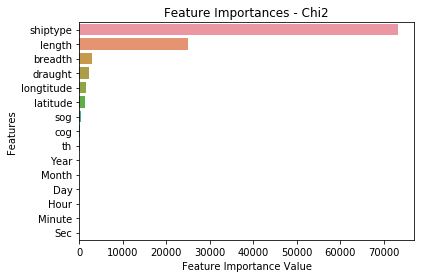

In [87]:
# Plotting the feature importances on bar plot
sns.barplot(x = feat_scores, y = x.columns )
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importances - Chi2")

# 10.Splitting the data into Training and Testing

In [89]:
# Importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split

In [109]:
# Segragating the inputs to x data frame and the output to y
x = Hamburg_fdf.drop(["tss","Points","callsign","Dest_Hamburg","name","destination"], axis = 1)
y = Hamburg_fdf["tss"]
# Printing the head of x
x.head()

mssi  shiptype  length  breadth  draught  longtitude  latitude  \
31446  218366000        70   335.0     42.0     12.5        9.94      53.5   
31447  218366000        70   335.0     42.0     12.5        9.94      53.5   
31448  218366000        70   335.0     42.0     12.5        9.94      53.5   
31449  218366000        70   335.0     42.0     12.5        9.94      53.5   
31450  218366000        70   335.0     42.0     12.5        9.94      53.5   

       sog    cog   th  Year  Month  Day  Hour  Minute  Sec  
31446  0.7   78.8    0  2018      2    1     5      17   15  
31447  0.8   76.3    0  2018      2    1     5      18   15  
31448  1.0   46.5  359  2018      2    1     5      19   15  
31449  1.6   17.8  356  2018      2    1     5      20   15  
31450  2.1  358.5  354  2018      2    1     5      21   15

In [110]:
# Printing the head of y data frame
y.head()

31446    1
31447    1
31448    1
31449    1
31450    1
Name: tss, dtype: int64

In [111]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

# 11.Applying Decision Tree

In [112]:
x.dtypes

mssi            int64
shiptype        int64
length        float64
breadth       float64
draught       float64
longtitude    float64
latitude      float64
sog           float64
cog           float64
th              int64
Year            int64
Month           int64
Day             int64
Hour            int64
Minute          int64
Sec             int64
dtype: object

In [113]:
# Importing the decision tree classifier from sklearn.
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
ctree = DecisionTreeClassifier()

In [114]:
# Chekcing the default attributes of the Decision Tree Classifier
ctree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
# Fititng the Decision Tree Classifier on training data and storing the model to ctree_model
start_time = time.time()
ctree_model = ctree.fit(x_train, y_train)
print("Time taken for training the Decision Tree model is : %.2f seconds" %(time.time() - start_time))
ctree_model

Time taken for training the Decision Tree model is : 0.25 seconds


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
# Predicting the output of ctree_model on test data and storing the result to y_pred
y_pred = ctree_model.predict(x_test)

In [117]:
# Importing the metrics such as confusino matrix and accuracy score from sklearn.
from sklearn.metrics import confusion_matrix, accuracy_score

In [118]:
# Printing the accuracy score and confusion matrix.
print("The accuracy score is :", accuracy_score(y_pred, y_test))
print("The Confusion Matrix is :", confusion_matrix(y_pred, y_test))

The accuracy score is : 0.8994931209268646
The Confusion Matrix is : [[7006  800]
 [ 588 5416]]


Text(0.5,1,'Confusion Matrix - Decision Tree')

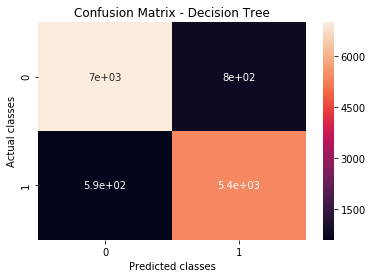

In [119]:
# Plotting the confusion matrix

cfm = confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.title("Confusion Matrix - Decision Tree")

In [120]:
# Printing the feature importance as per the fitted decision tree model
feature_importance = pd.Series(ctree.feature_importances_, index = x.columns).sort_values(ascending = False)
feature_importance

Day           0.429108
Month         0.238585
mssi          0.091303
draught       0.062492
shiptype      0.061183
length        0.059007
breadth       0.015481
cog           0.010145
Minute        0.009052
sog           0.006352
th            0.005684
Hour          0.005075
longtitude    0.003238
Sec           0.002668
latitude      0.000627
Year          0.000000
dtype: float64

Text(0.5,1,'Feature Importances - Decision Tree')

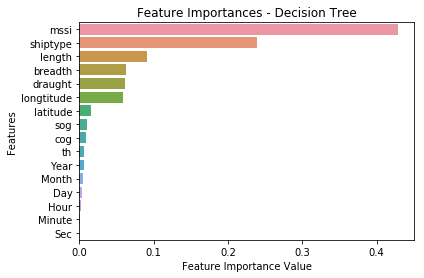

In [121]:
# Plotting the feature importances on bar plot
sns.barplot(x = feature_importance, y = x.columns )
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("Feature Importances - Decision Tree")

In [122]:
# Import graphviz to displaye the decision tree
import graphviz
from sklearn import tree

In [123]:
# Set the attributes of the graphviz and display the decision tree graph
tree_data = tree.export_graphviz(ctree_model, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['N', 'S'], # Category Names goes in this list
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

# 12.Fine Tuning the Decision Tree

In [124]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [125]:
# Set all the required parameters
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [ 5,7,9,10,12 ], 
               "max_depth"      : [ 5, 6, 7,10,12,15],
               "splitter"       : ['best', 'random'],
               "min_samples_leaf"  : [ 2,3,4]
                }

In [126]:
# Initialize the GridSearchCV model
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5) 

In [128]:
# Fit the model on trianing data
start_time = time.time()
optimized_tree .fit(x_train, y_train)
print("Time taken for training the Decision Tree model after fine tuning is : %.2f seconds" %(time.time() - start_time))

Time taken for training the Decision Tree model after fine tuning is : 119.46 seconds


In [129]:
# Predict the output and store it in opt_y_pred
opt_y_pred = optimized_tree.predict(x_test)

In [130]:
# Print the accuracy score and confusion matrix

print("The accuracy score is :", accuracy_score(opt_y_pred, y_test))
print("The Confusion Matrix is :", confusion_matrix(opt_y_pred, y_test))

The accuracy score is : 0.9319333816075308
The Confusion Matrix is : [[6893  239]
 [ 701 5977]]


Text(0.5,1,'Confusion Matrix - Decision Tree')

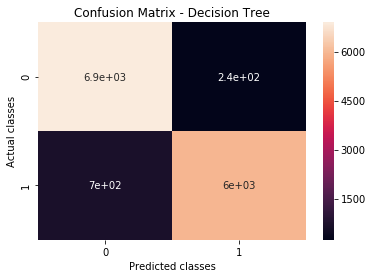

In [131]:
# Plot the Confusion matrix

cfm = confusion_matrix(opt_y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.title("Confusion Matrix - Decision Tree")

In [132]:
# Print the best estimator
print("The best estimator is : ",optimized_tree.best_estimator_)

The best estimator is :  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [133]:
# Storing the best estimator to ctree_final
ctree_final = optimized_tree.best_estimator_
ctree_final

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

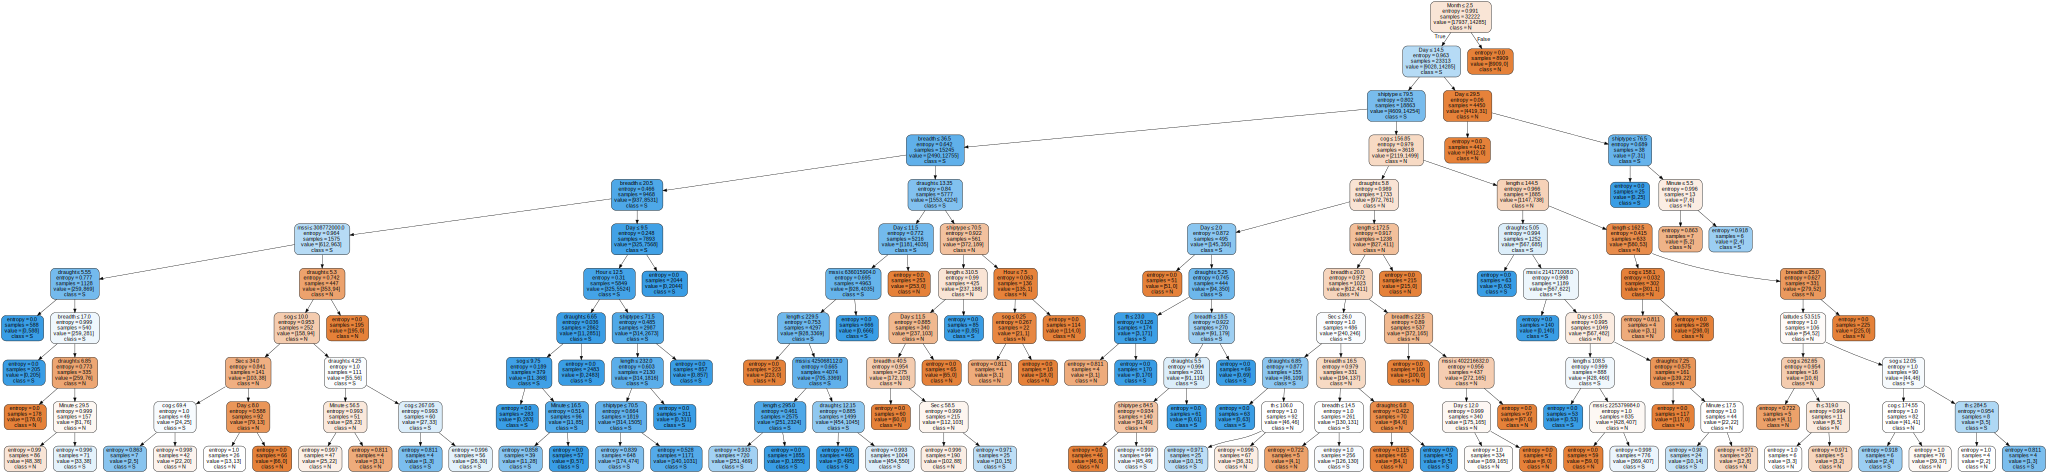

In [134]:
# Display the Decision Tree after fine tuning

tree_data = tree.export_graphviz(ctree_final, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['N', 'S'], # Category Names goes in this list
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

# 16.Applying LOGISTIC REGRESSION

In [135]:
# Importing the Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialzing the Logistic Regression to log_model
log_model = LogisticRegression()

In [136]:
# Fitting the log_model on trining data

start_time = time.time()
log_model.fit(x_train, y_train)
end_time = time.time()
print("Time taken for training the Logistic Regression model is : %.2f seconds " %(time.time() - start_time))

Time taken for training the Logistic Regression model is : 0.08 seconds 


In [137]:
# Predicting the test output with log_model and storing it in y_pred_log
y_pred_log = log_model.predict(x_test)

In [138]:
# The Coefficients and intercept of the model are
coefs = log_model.coef_
intercept = log_model.intercept_

coefs_list = [y for x in coefs for y in x]
parameters_coef = pd.Series(coefs_list, index = x_train.columns)
print("The coefficients are \n",parameters_coef)
print("The intercept is : ", log_model.intercept_)

The coefficients are 
 mssi         -5.579971e-10
shiptype     -1.898723e-16
length       -6.685809e-17
breadth      -2.571067e-17
draught      -8.156609e-18
longtitude   -1.730814e-17
latitude     -9.383117e-17
sog          -1.511037e-17
cog          -3.377212e-16
th           -3.500950e-16
Year         -3.538131e-15
Month        -1.074152e-17
Day          -1.332225e-16
Hour         -2.175664e-17
Minute       -5.263519e-17
Sec          -2.175658e-17
dtype: float64
The intercept is :  [-1.75328601e-18]


In [139]:
# Print the accuracy score and confusion matrix

print("The accuracy score is :", accuracy_score(y_pred_log, y_test))
print("The Confusion Matrix is :", confusion_matrix(y_pred_log, y_test))

The accuracy score is : 0.5498913830557567
The Confusion Matrix is : [[7594 6216]
 [   0    0]]


Text(0.5,1,'Confusion Matrix - Logistic Regression')

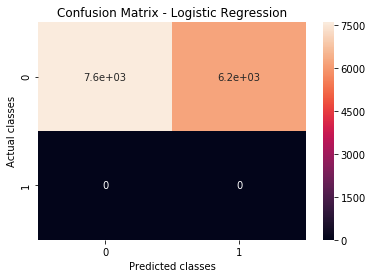

In [140]:
# Plotting the confusion matrix

cfm = confusion_matrix(y_pred_log, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.title("Confusion Matrix - Logistic Regression")

# 17.Fine Tuning Logistic Regression

In [141]:
# penalty specifies the norm in the penalization
penalty = ['l1', 'l2']

# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]

# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty,random_state=random_state)

In [142]:
# Initializng the GridSearchCV

clf = GridSearchCV(estimator = log_model, param_grid = hyperparameters,cv=5)

start_time = time.time()
# Fitting the model
clf.fit(x_train, y_train)

print("Time taken for training the Logistic Regression Model after tuning is : %.2f seconds" %(time.time() - start_time))

# Predicting the ouptut on test data
tune_y_pred = clf.predict(x_test)

Time taken for training the Logistic Regression Model after tuning is : 465.15 seconds


In [143]:
# Print the accuracy score and confusion matrix

print("The accuracy score is :", accuracy_score(tune_y_pred, y_test))
print("The Confusion Matrix is :", confusion_matrix(tune_y_pred, y_test))

The accuracy score is : 0.8711803041274438
The Confusion Matrix is : [[6182  367]
 [1412 5849]]


Text(0.5,1,'Confusion Matrix - Logistic Regression')

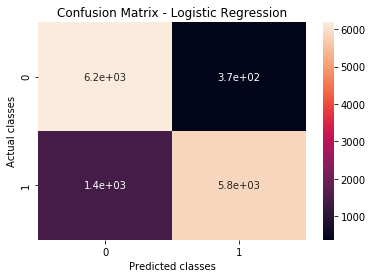

In [144]:
# Plotting the confusion matrix

cfm = confusion_matrix(tune_y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.title("Confusion Matrix - Logistic Regression")

In [145]:
# Storing the best estimator to final_log_model
final_log_model = clf.best_estimator_
final_log_model

LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [146]:
# The Coefficients and intercept of the model are
coefs = final_log_model.coef_
intercept = final_log_model.intercept_

coefs_list = [y for x in coefs for y in x]
parameters_coef = pd.Series(coefs_list, index = x_train.columns)
print("The coefficients are \n",parameters_coef)
print("The intercept is : ", log_model.intercept_)

The coefficients are 
 mssi         -7.233335e-10
shiptype     -1.739394e-02
length        1.342126e-02
breadth      -9.185320e-02
draught       1.553553e-02
longtitude    4.796349e-01
latitude      1.102541e-01
sog          -7.228580e-04
cog          -6.969168e-05
th            9.189768e-05
Year          2.243499e-03
Month        -7.900203e+00
Day          -2.292558e-01
Hour         -8.433761e-03
Minute       -1.105796e-03
Sec           5.291178e-03
dtype: float64
The intercept is :  [-1.75328601e-18]
